In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import numpy

<function matplotlib.pyplot.show(*args, **kw)>

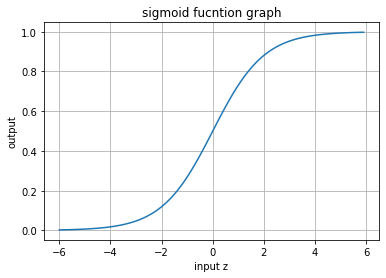

In [2]:
z=np.arange(-6,6,0.1)
sigmoid=1/(1+np.exp(-z))
fig=plt.figure('cost function')
plt.plot(z,sigmoid)
plt.grid(True)
plt.xlabel('input z')
plt.ylabel('output')
plt.title('sigmoid fucntion graph')
plt.show

In [3]:
t=np.ones((2,3))
t.shape

(2, 3)

In [4]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = 1 / (1 + np.exp(-float(np.matmul(theta, X[i]))))
    h = h.reshape(X.shape[0])
    return h

In [10]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    theta_history = np.ones((num_iters,n+1))
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j]=theta[j]-(alpha/X.shape[0])*sum((h-y)
                               *X.transpose()[j])
        theta_history[i] = theta
        h = hypothesis(theta, X, n)
        cost[i]=(-1/X.shape[0])*sum(y*np.log(h)+(1-y)*np.log(1 - h))
    theta = theta.reshape(1,n+1)
    return theta, theta_history, cost

In [11]:
def logistic_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta,theta_history,cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, theta_history, cost

In [12]:
data = np.loadtxt('logistic_dataset.txt', delimiter=',')
X_train = data[:,[0,1]] # feature-set
y_train = data[:,2] # label-set

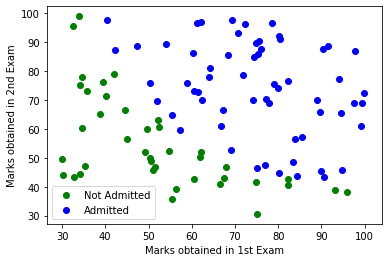

In [13]:
x0 = np.ones((np.array([x for x in y_train if x == 0]).shape[0], 
              X_train.shape[1]))
x1 = np.ones((np.array([x for x in y_train if x == 1]).shape[0], 
              X_train.shape[1]))
#x0 and x1 are matrices containing +ve and -ve examples from the
#dataset, initialized to 1
k0 = k1 = 0
for i in range(0,y_train.shape[0]):
    if y_train[i] == 0:
        x0[k0] = X_train[i]
        k0 = k0 + 1
    else:
        x1[k1] = X_train[i]
        k1 = k1 + 1
X = [x0, x1]
colors = ["green", "blue"] # 2 distinct colours for 2 classes 
import matplotlib.pyplot as plt
for x, c in zip(X, colors):
    if c == "green":
        plt.scatter(x[:,0],x[:,1],color = c,label = "Not Admitted")
    else:
        plt.scatter(x[:,0], x[:,1], color = c, label = "Admitted")
plt.xlabel("Marks obtained in 1st Exam")
plt.ylabel("Marks obtained in 2nd Exam")
plt.legend()

In [14]:
num_iters = 100000
theta,theta_history,cost=logistic_regression(X_train,y_train,0.001,num_iters = 100000)

In [15]:
print(theta)

[[-4.81180027  0.04528064  0.03819149]]


Text(0, 0.5, 'Cost')

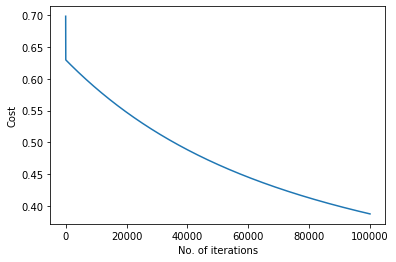

In [17]:
cost = list(cost)
n_iterations = [x for x in range(1,100001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

In [18]:
X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train)
                          , axis = 1)
h = hypothesis(theta, X_train, X_train.shape[1] - 1)
# Taking 0.5 as threshold:
for i in range(0, h.shape[0]):
    if h[i] > 0.5:
        h[i] = 1
    else:
        h[i] = 0

In [19]:
k = 0
for i in range(0, h.shape[0]):
    if h[i] == y_train[i]:
        k = k + 1
accuracy = k/y_train.shape[0]

In [20]:
accuracy

0.91